# Flow of pollutant through real met data

**Make sure you separately upload the following files into google colab here on the left side: "india_boundary.shp, .shx, .prj, .dbf, .cpg and wind_data.npy"**

**If you are running on your local machine, install geopandas separately**

**If you are facing issues installing stuff, you may reach out to friends and our tutors to get help**

Solve the scalar transport equation (advection diffusion equation) as developed in lab session for a given velocity field, on the velocity field of real met data. The sample code for advection diffusion is provided. But please fill in the appropriate formula for difference approximation inside that code. Then use those function within this file. 

Below is the data, and the code for importing the data into python. I have shown a sample plot of velocity vectors also. 

From here on continue to initialize with an initial concentration field in some region in the map. We will be looking at how this concentration changes with time. 
<!-- From here on continue to incorporate the option to provide a boundary condition **inside** the map.  -->

<!-- Note the **wall** condition in the sample code for advection diffusion discussed in class. Use that to select a rectangular region using lattitude longitude coordinates. Thereafter the time update will treat this patch as the dirichlet boundary. Use one grid point along the four edges of the domain as boundary cells, with 0 Dirichlet boundary condition.
 -->
## What should you try :

* In class a definition for Peclet number was used. Use that for the given problem also and choose a peclet number less than 2, so that the problem is more diffusive than convective. For a given chosen region, use a pollutant of concentration 1 unit and appropriate diffusion coefficient so that Peclet number is 2 or less. Simulate for a long enough time so that the pollutant reaches one or more of the domain boundaries. 

* Use a smaller diffusion now, so that the Peclet number becomes greater than 2. Observe if the simulation shows any issues. Read up about advection schemes and comment on the difficulties. 
* Use appropriate dimensions. You could used degrees for the spatial variable. But for physical correctness, you can research and find out the conversion between lat/long degrees and distance in kilometers, also. 

*The code that was done in lab class for advection diffusion in a given circular velocity field is given in the same folder for reference*


# Project 4, APL703


## Soban Nasir Lone
### 2022AMY7554

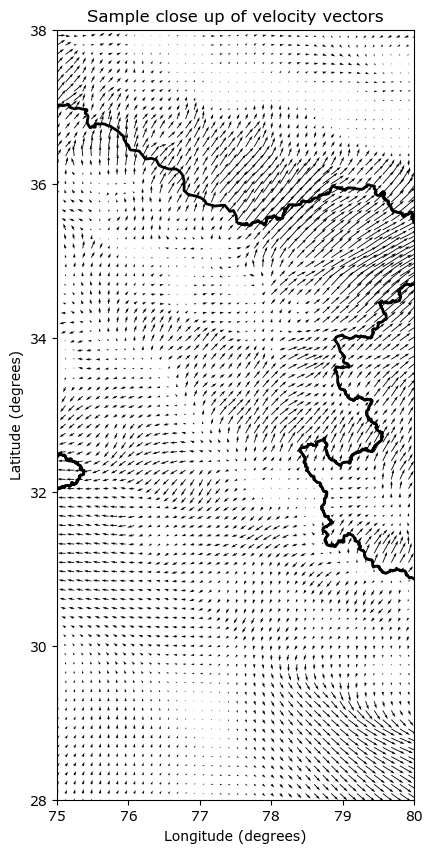

In [250]:
import numpy as np
import matplotlib.pyplot as pl
import geopandas as gpd

with open('./wind_data.npy', 'rb') as f:
    LO = np.load(f)
    LA = np.load(f)
    UU = np.load(f)
    VV = np.load(f)
# India's lattitudes and longitudes
idx  = (LO>68) & (LO<98) & ( LA>8) & (LA<38)

LO = LO[idx]
LA = LA[idx]
UU = UU[idx]
VV = VV[idx]

india =  gpd.read_file('india_boundary.shp')
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
india.boundary.plot( linewidth=2, ax=ax,  edgecolor='0.2',color='k')
pl.quiver(LO,LA,UU,VV, scale_units='dots', scale=0.2)
#actual limits
#pl.xlim((68,98))
#pl.ylim((8,38))
pl.title("Sample close up of velocity vectors")
pl.xlabel("Longitude (degrees)")
pl.ylabel("Latitude (degrees)")
pl.xlim((75,80))
pl.ylim((28,38))

pl.show()

Taking the Lat, Long of Delhi, we have:


In [255]:
idx  = (LO>75) & (LO<77) & ( LA>27) & (LA<29.1)

In [256]:

LO = LO[idx]
LA = LA[idx]
UU = UU[idx]
VV = VV[idx]

In [257]:
max(UU), min(UU)

(0.5510913, -0.7487346)

In [258]:
max(VV), min(VV)

(0.92918843, -0.3262372)

In [183]:
for i in range(289):
    if VV[i] == max(VV):
        print(i)
        print(UU[i])

278
0.04946415


Magnitude of maximum velocity to find the Pechlet number.

In [211]:
velmaxmag = np.sqrt(0.9291884**2 + 0.04946415**2)

In [117]:
np.size(VV)

289

Reshaping the 1D velocities to 2D in order to be able to index over them

In [259]:
c_x = UU.reshape((17,17))
c_y = VV.reshape((17,17))

### The Numerical Solution of Advection Diffusion Equation:

In [261]:


def advection_diffusion(nx, ny, dx, dy, phi, c_x,c_y, alpha, dphi):
    
    for j in np.arange(1,ny):
        for i in np.arange(1,nx-20):
            
            dphi[i][j] = (-0.5*c_x[i][j]/dx)*(phi[i+1][j] - phi[i-1][j]) -(0.5*c_y[i][j]/dy)* (phi[i][j+1] - phi[i][j-1]) + 1/(dx**2)*alpha*(phi[i+1][j] + phi[i-1][j] + phi[i][j+1] + phi[i][j-1] - 4*phi[i][j]) 
    return dphi

In [260]:
dphi = np.empty((17,17))

### For Pechlet Number <2, Advection more than Diffusion

In [262]:
nx = 17
ny = nx
N = ny*nx
L = 1.0
dx = L/nx
dy = L/ny
phi = np.ones(nx*ny)
alpha = 0.2
Pechlet = velmaxmag*dx/alpha
print("Pechlet number is: " ,Pechlet)

# mesh 
x = np.linspace(0,nx*dx, nx )
y = np.linspace(0,ny*dx, ny)
XX,YY = np.meshgrid(x,y)

phi_mesh = phi.reshape(nx,ny)


Pechlet number is:  0.27367766141122574


Running the Solution over different time steps

In [277]:
import random
random.seed(22)
phi = np.random.rand(17*17)
phi = phi.reshape((17,17))
dphi = np.empty((17,17))
t = 0 
end_time = 0.8
dt = 0.001

Ntime = int(end_time/dt)

for k in range(Ntime):
    advection_diffusion(nx, ny, dx, dy, phi, c_x,c_y, alpha, dphi)
    phi =  phi + dt*dphi
print("Done")

    

Done


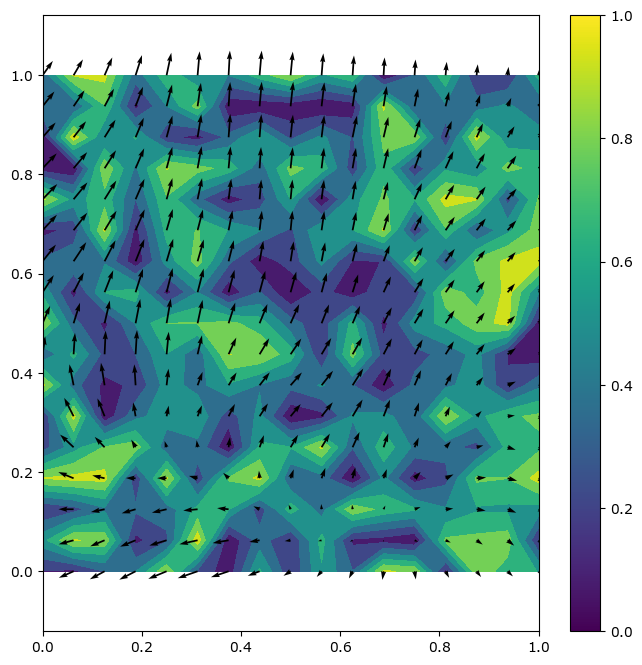

In [278]:
pl.figure(figsize=(8,8))
pl.axis("equal")
pl.contourf(XX,YY,phi)
pl.quiver(XX,YY,c_x,c_y)
pl.colorbar()

Visualisng the Velocity Vectors Near the Delhi Region

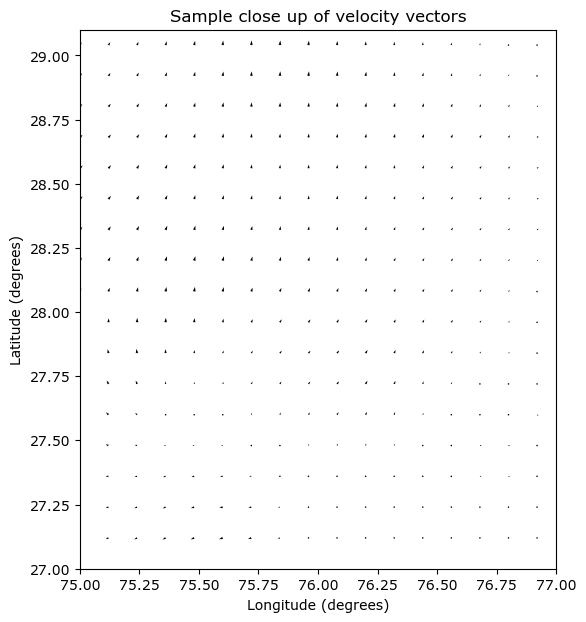

In [265]:

india =  gpd.read_file('india_boundary.shp')
fig = pl.figure(figsize=(7,7))
ax = fig.add_subplot(111)
india.boundary.plot( linewidth=2, ax=ax,  edgecolor='0.2',color='k')
pl.quiver(LO,LA,UU,VV, scale_units='dots', scale=0.2)
pl.contourf(XX,YY,phi)

pl.title("Sample close up of velocity vectors")
pl.xlabel("Longitude (degrees)")
pl.ylabel("Latitude (degrees)")
pl.xlim((75,77))
pl.ylim((27,29.1))

pl.show()

### For Pechlet Number >2, Diffusion more than  Advection

In [279]:

phi = np.ones(nx*ny)
alpha = 0.02

Pechlet = velmaxmag*dx/alpha
print("Pechlet number is: " ,Pechlet)


# mesh 
x = np.linspace(0,nx*dx, nx )
y = np.linspace(0,ny*dx, ny)
XX,YY = np.meshgrid(x,y)
phi_mesh = phi.reshape(nx,ny)


Pechlet number is:  2.7367766141122574


In [280]:
random.seed(22)
phi = np.random.rand(17*17)
phi = phi.reshape((17,17))
dphi = np.empty((17,17))
t = 0 
end_time = 0.8
dt = 0.001

Ntime = int(end_time/dt)



for k in range(Ntime):
    advection_diffusion(nx, ny, dx, dy, phi, c_x,c_y, alpha, dphi)
    phi =  phi + dt*dphi
print("Done")

    

Done


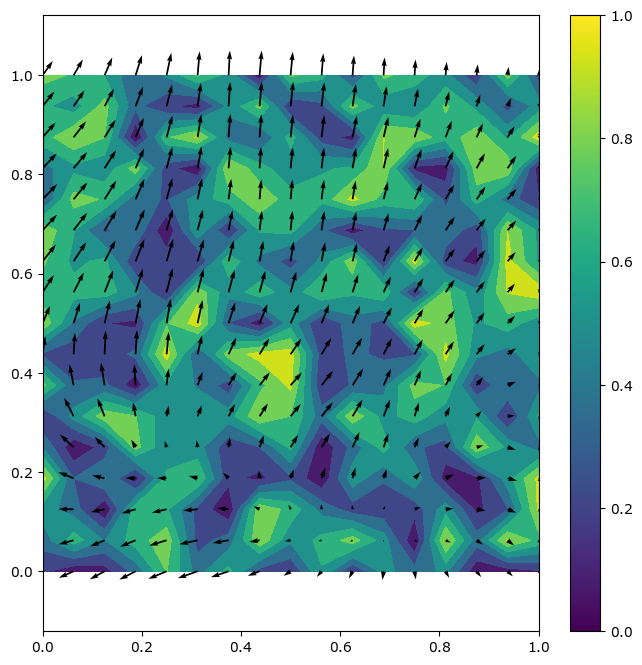

In [281]:
pl.figure(figsize=(8,8))
pl.axis("equal")
pl.contourf(XX,YY,phi)
pl.quiver(XX,YY,c_x,c_y)
pl.colorbar()